In [148]:
import copy
import math
import joblib
import pandas as pd
import numpy as np
import scipy.stats as ss
from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn import metrics, tree

from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [121]:
mushroom_data = pd.read_csv('Dataset/mushroom_data.csv', delimiter = ';')

In [122]:
mushroom_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [123]:
mushroom_data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [124]:
print("Number of Columns: ", mushroom_data.shape[0])
print("Number of Rows: ", mushroom_data.shape[1])

Number of Columns:  61069
Number of Rows:  21


In [125]:
print("\nNull Values")
print(mushroom_data.isna().any())


Null Values
class                   False
cap-diameter            False
cap-shape               False
cap-surface              True
cap-color               False
does-bruise-or-bleed    False
gill-attachment          True
gill-spacing             True
gill-color              False
stem-height             False
stem-width              False
stem-root                True
stem-surface             True
stem-color              False
veil-type                True
veil-color               True
has-ring                False
ring-type                True
spore-print-color        True
habitat                 False
season                  False
dtype: bool


In [126]:
for column in mushroom_data.columns:
    if mushroom_data[column].dtypes == 'object':
        uniq = list(mushroom_data[column].unique())
        print('{}: {} distinct values -  {}\n'.format(column, len(uniq), uniq))

class: 2 distinct values -  ['p', 'e']

cap-shape: 7 distinct values -  ['x', 'f', 'p', 'b', 'c', 's', 'o']

cap-surface: 12 distinct values -  ['g', 'h', nan, 't', 'y', 'e', 's', 'l', 'd', 'w', 'i', 'k']

cap-color: 12 distinct values -  ['o', 'e', 'n', 'g', 'r', 'w', 'y', 'p', 'u', 'b', 'l', 'k']

does-bruise-or-bleed: 2 distinct values -  ['f', 't']

gill-attachment: 8 distinct values -  ['e', nan, 'a', 'd', 's', 'x', 'p', 'f']

gill-spacing: 4 distinct values -  [nan, 'c', 'd', 'f']

gill-color: 12 distinct values -  ['w', 'n', 'p', 'u', 'b', 'g', 'y', 'r', 'e', 'o', 'k', 'f']

stem-root: 6 distinct values -  ['s', nan, 'b', 'r', 'c', 'f']

stem-surface: 9 distinct values -  ['y', nan, 's', 'k', 'i', 'h', 't', 'g', 'f']

stem-color: 13 distinct values -  ['w', 'y', 'n', 'u', 'b', 'l', 'r', 'p', 'e', 'k', 'g', 'o', 'f']

veil-type: 2 distinct values -  ['u', nan]

veil-color: 7 distinct values -  ['w', 'y', nan, 'n', 'e', 'u', 'k']

has-ring: 2 distinct values -  ['t', 'f']

ring-ty

# Drop Duplicates

In [127]:
print('Known mushrooms: {}\nUnique mushrooms: {}'.format(len(mushroom_data.index),len(mushroom_data.drop_duplicates().index)))

Known mushrooms: 61069
Unique mushrooms: 60923


In [128]:
mushroom_data_dd = mushroom_data.drop_duplicates()

In [129]:
print('Known mushrooms: {}\nUnique mushrooms: {}'.format(len(mushroom_data_dd.index),len(mushroom_data_dd.drop_duplicates().index)))

Known mushrooms: 60923
Unique mushrooms: 60923


# Missing Values

In [130]:
missing_columns = []
all_column_nan = dict(mushroom_data_dd.isna().any())
for key, value in all_column_nan.items():
    if value:
        missing_columns.append(key)

In [131]:
print("Printing all values for column with missing values")

for column in missing_columns:
    print("\nMissing Values in {0}".format(column))
    print(list(mushroom_data_dd[column].unique()))

Printing all values for column with missing values

Missing Values in cap-surface
['g', 'h', nan, 't', 'y', 'e', 's', 'l', 'd', 'w', 'i', 'k']

Missing Values in gill-attachment
['e', nan, 'a', 'd', 's', 'x', 'p', 'f']

Missing Values in gill-spacing
[nan, 'c', 'd', 'f']

Missing Values in stem-root
['s', nan, 'b', 'r', 'c', 'f']

Missing Values in stem-surface
['y', nan, 's', 'k', 'i', 'h', 't', 'g', 'f']

Missing Values in veil-type
['u', nan]

Missing Values in veil-color
['w', 'y', nan, 'n', 'e', 'u', 'k']

Missing Values in ring-type
['g', 'p', 'e', 'l', 'f', 'm', nan, 'r', 'z']

Missing Values in spore-print-color
[nan, 'w', 'p', 'k', 'r', 'u', 'n', 'g']


In [132]:
print("Printing value distribution of columns with missing values")

for column in missing_columns:
    print("\nMissing Values in {0}".format(column))
    print(mushroom_data_dd[column].value_counts(dropna=False))
    temp = dict(mushroom_data_dd[column].value_counts(dropna=False))
    total_val = sum(list(temp.values()))
    nan_val = temp[np.nan]
    print('->Percentage of missing value in {0}: {1}%'.format(column, round(100*nan_val/total_val, 2)))

Printing value distribution of columns with missing values

Missing Values in cap-surface
cap-surface
NaN    14120
t       8184
s       7580
y       6341
h       4974
g       4722
d       4432
e       2584
k       2303
i       2225
w       2150
l       1308
Name: count, dtype: int64
->Percentage of missing value in cap-surface: 23.18%

Missing Values in gill-attachment
gill-attachment
a      12697
d      10247
NaN     9855
x       7413
p       6001
e       5648
s       5648
f       3414
Name: count, dtype: int64
->Percentage of missing value in gill-attachment: 16.18%

Missing Values in gill-spacing
gill-spacing
NaN    25062
c      24682
d       7765
f       3414
Name: count, dtype: int64
->Percentage of missing value in gill-spacing: 41.14%

Missing Values in stem-root
stem-root
NaN    51536
s       3177
b       3177
r       1412
f        915
c        706
Name: count, dtype: int64
->Percentage of missing value in stem-root: 84.59%

Missing Values in stem-surface
stem-surface
NaN    38

**Will replace 'nan' values with 'o' which means "Other".**

In [133]:
# replace the nan' values with new category 'other' 
mushroom_data_dd_nao = mushroom_data_dd.fillna('ot')

In [134]:
for column, dtype in dict(mushroom_data_dd_nao.dtypes).items():
    if dtype == 'object':
        mushroom_data_dd_nao[column] = pd.Categorical(mushroom_data_dd_nao[column])

In [135]:
print("\nNull Values")
print(mushroom_data_dd_nao.isna().any())


Null Values
class                   False
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool


# EDA

## Class Distrbution

In [136]:
print("All Mushroom classes Present: {0}".format(mushroom_data_dd_nao['class'].unique()))
mushroom_classes = list(mushroom_data_dd_nao['class'].unique())

All Mushroom classes Present: ['p', 'e']
Categories (2, object): ['e', 'p']


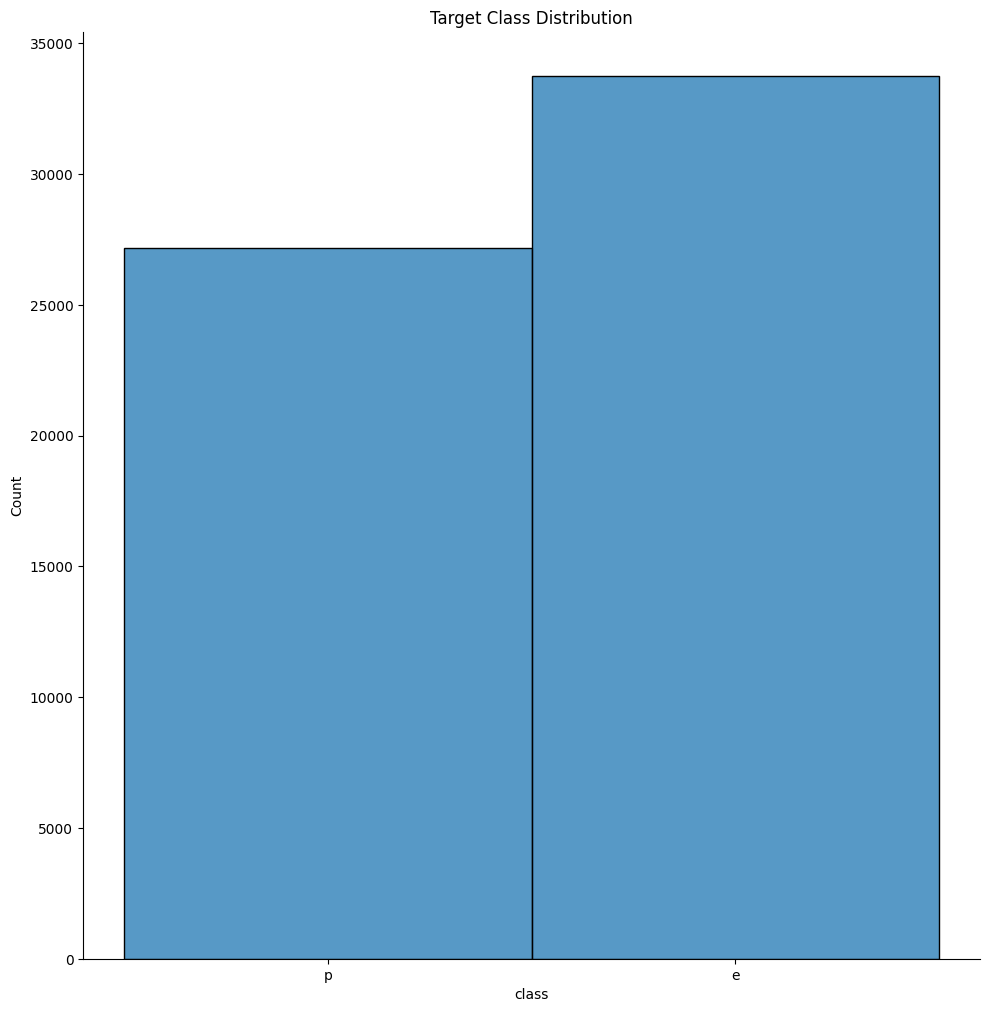

In [137]:
ax = sns.displot(mushroom_data_dd_nao['class'], kde=False, height=10)
plt.xticks([0, 1])
ax.set_xticklabels(mushroom_classes)
plt.title('Target Class Distribution')
plt.show()
ax.figure.savefig('Result/Analysis Images/Target_Class_Distribution.png')

## Correlation

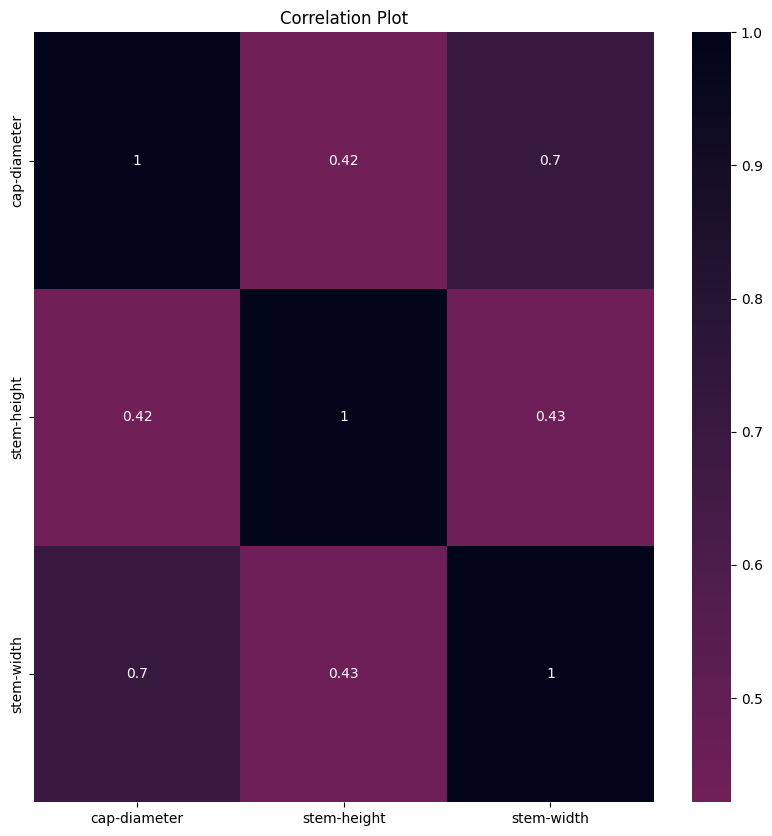

In [138]:
plt.figure(figsize=(10,10))
cmap = sns.color_palette("rocket_r", as_cmap=True)
plt.title('Correlation Plot')
corr = sns.heatmap(mushroom_data_dd_nao.corr(numeric_only=True), annot=True, cmap=cmap, center=0)
plt.show()
corr.figure.savefig('Result/Analysis Images/Correlation_Plot.png')

In [139]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

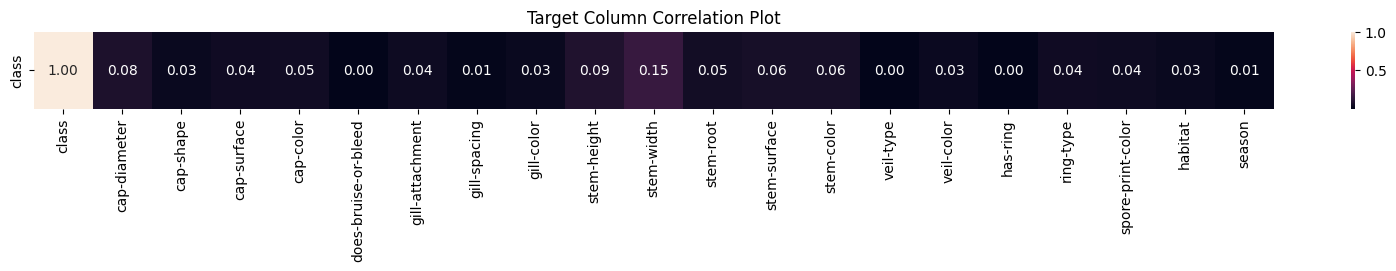

In [140]:
theilu = pd.DataFrame(index=['class'], columns=mushroom_data_dd_nao.columns)

columns = mushroom_data_dd_nao.columns

for j in range(0,len(columns)):
    u = theil_u(mushroom_data_dd_nao['class'].tolist(), mushroom_data_dd_nao[columns[j]].tolist())
    theilu.loc[:, columns[j]] = u

theilu.fillna(value=np.nan, inplace=True)
theilu = theilu.astype('float64')
plt.figure(figsize=(20, 1))
plt.title('Target Column Correlation Plot')
target_corr = sns.heatmap(theilu ,annot=True, fmt='.2f')
plt.show()
target_corr.figure.savefig('Result/Analysis Images/Target_Column_Correlation_Plot.png')

# Encode Categorical

In [74]:
mushroom_data_dd_nao.dtypes

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [75]:
categorical_columns = []
for column in mushroom_data_dd_nao.columns:
    if mushroom_data_dd_nao[column].dtypes == 'category':
        categorical_columns.append(column)
        category_dist = dict(enumerate(mushroom_data_dd_nao[column].cat.categories))
        print("The category distrbution for column {0} class attribute {1}\n".format(column, category_dist))
        mushroom_data_dd_nao[column + '_cat'] = mushroom_data_dd_nao[column].cat.codes

The category distrbution for column class class attribute {0: 'e', 1: 'p'}

The category distrbution for column cap-shape class attribute {0: 'b', 1: 'c', 2: 'f', 3: 'o', 4: 'p', 5: 's', 6: 'x'}

The category distrbution for column cap-surface class attribute {0: 'd', 1: 'e', 2: 'g', 3: 'h', 4: 'i', 5: 'k', 6: 'l', 7: 'ot', 8: 's', 9: 't', 10: 'w', 11: 'y'}

The category distrbution for column cap-color class attribute {0: 'b', 1: 'e', 2: 'g', 3: 'k', 4: 'l', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}

The category distrbution for column does-bruise-or-bleed class attribute {0: 'f', 1: 't'}

The category distrbution for column gill-attachment class attribute {0: 'a', 1: 'd', 2: 'e', 3: 'f', 4: 'ot', 5: 'p', 6: 's', 7: 'x'}

The category distrbution for column gill-spacing class attribute {0: 'c', 1: 'd', 2: 'f', 3: 'ot'}

The category distrbution for column gill-color class attribute {0: 'b', 1: 'e', 2: 'f', 3: 'g', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w'

In [76]:
mushroom_data_dd_nao.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root_cat,stem-surface_cat,stem-color_cat,veil-type_cat,veil-color_cat,has-ring_cat,ring-type_cat,spore-print-color_cat,habitat_cat,season_cat
0,p,15.26,x,g,o,f,e,ot,w,16.95,...,5,8,11,1,5,1,2,3,0,3
1,p,16.60,x,g,o,f,e,ot,w,17.99,...,5,8,11,1,5,1,2,3,0,2
2,p,14.07,x,g,o,f,e,ot,w,17.80,...,5,8,11,1,5,1,2,3,0,3
3,p,14.17,f,h,e,f,e,ot,w,15.77,...,5,8,11,1,5,1,6,3,0,3
4,p,14.64,x,h,o,f,e,ot,w,16.53,...,5,8,11,1,5,1,6,3,0,3


# Transformation and Splitting

In [77]:
removed_column = copy.deepcopy(categorical_columns)
removed_column.append('class_cat')

In [78]:
X, y = mushroom_data_dd_nao.drop(removed_column, axis=1), mushroom_data_dd_nao['class_cat']

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
print("First row of the standardized dataset")
print(X_scaled[0])

First row of the standardized dataset
[ 1.61682025  3.08235556  0.48966898  0.91376808 -1.28206853 -0.04758726
 -0.45869243 -0.43749866  1.11252174  0.83387532  2.37439283  1.97984019
  0.79691842  4.26336333  2.65604017  1.73689747  0.16651043 -0.01435596
 -0.49345491  1.77031588]


In [81]:
feature_names = list(X.columns)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [83]:
print('-Dataset Size-')
print('Training dataset Set:', len(X_train))
print('Test dataset Set:', len(X_test))

-Dataset Size-
Training dataset Set: 42646
Test dataset Set: 18277


# Modeling

## XGBoost

### Training

In [84]:
xgb_params = {}
xgb_params['learning_rate'] = 0.05
xgb_params['objective'] ='binary:logistic'
xgb_params['n_estimators'] = 800
xgb_params['eval_metric'] = 'error'
xgb_params['early_stopping_rounds'] = 400

In [85]:
xgbm = XGBClassifier()
xgbm.set_params(**xgb_params)
xgbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
xgbm.get_booster().feature_names = feature_names

[0]	validation_0-error:0.44616	validation_1-error:0.44613
[1]	validation_0-error:0.44616	validation_1-error:0.44613
[2]	validation_0-error:0.38276	validation_1-error:0.38206
[3]	validation_0-error:0.37370	validation_1-error:0.37238
[4]	validation_0-error:0.35155	validation_1-error:0.35110
[5]	validation_0-error:0.26319	validation_1-error:0.25951
[6]	validation_0-error:0.24748	validation_1-error:0.24933
[7]	validation_0-error:0.20229	validation_1-error:0.20403
[8]	validation_0-error:0.18684	validation_1-error:0.18958
[9]	validation_0-error:0.18192	validation_1-error:0.18340
[10]	validation_0-error:0.17655	validation_1-error:0.17820
[11]	validation_0-error:0.14984	validation_1-error:0.14997
[12]	validation_0-error:0.13689	validation_1-error:0.13815
[13]	validation_0-error:0.12472	validation_1-error:0.12584
[14]	validation_0-error:0.12353	validation_1-error:0.12546
[15]	validation_0-error:0.11715	validation_1-error:0.11906
[16]	validation_0-error:0.11291	validation_1-error:0.11441
[17]	va

In [86]:
print("Best Model Iteration: ", xgbm.best_iteration)

Best Model Iteration:  670


In [87]:
xgbm_y_train_pred = xgbm.predict(X_train)

In [88]:
xgbm_train_acc = metrics.accuracy_score(y_train, xgbm_y_train_pred)
xgbm_train_pre = metrics.precision_score(y_train, xgbm_y_train_pred, average='weighted')
xgbm_train_rec = metrics.recall_score(y_train, xgbm_y_train_pred, average='weighted')

In [89]:
print('XGBoost Accuracy on train dataset:', xgbm_train_acc)
print('XGBoost Precision on train dataset:', xgbm_train_pre)
print('XGBoost Recall on train dataset:', xgbm_train_rec)

XGBoost Accuracy on train dataset: 1.0
XGBoost Precision on train dataset: 1.0
XGBoost Recall on train dataset: 1.0


### Testing

In [90]:
xgbm_y_test_preds = xgbm.predict(X_test)

In [91]:
xgbm_test_acc = metrics.accuracy_score(y_test, xgbm_y_test_preds)
xgbm_test_pre = metrics.precision_score(y_test, xgbm_y_test_preds, average='weighted')
xgbm_test_rec = metrics.recall_score(y_test, xgbm_y_test_preds, average='weighted')
xgbm_test_cnf_matrix = metrics.confusion_matrix(y_test, xgbm_y_test_preds)

In [92]:
print('XGBoost Accuracy on test dataset:', xgbm_test_acc)
print('XGBoost Precision on test dataset:', xgbm_test_pre)
print('XGBoost Recall on test dataset:', xgbm_test_rec)

XGBoost Accuracy on test dataset: 0.9998905728511244
XGBoost Precision on test dataset: 0.9998905728511244
XGBoost Recall on test dataset: 0.9998905728511244


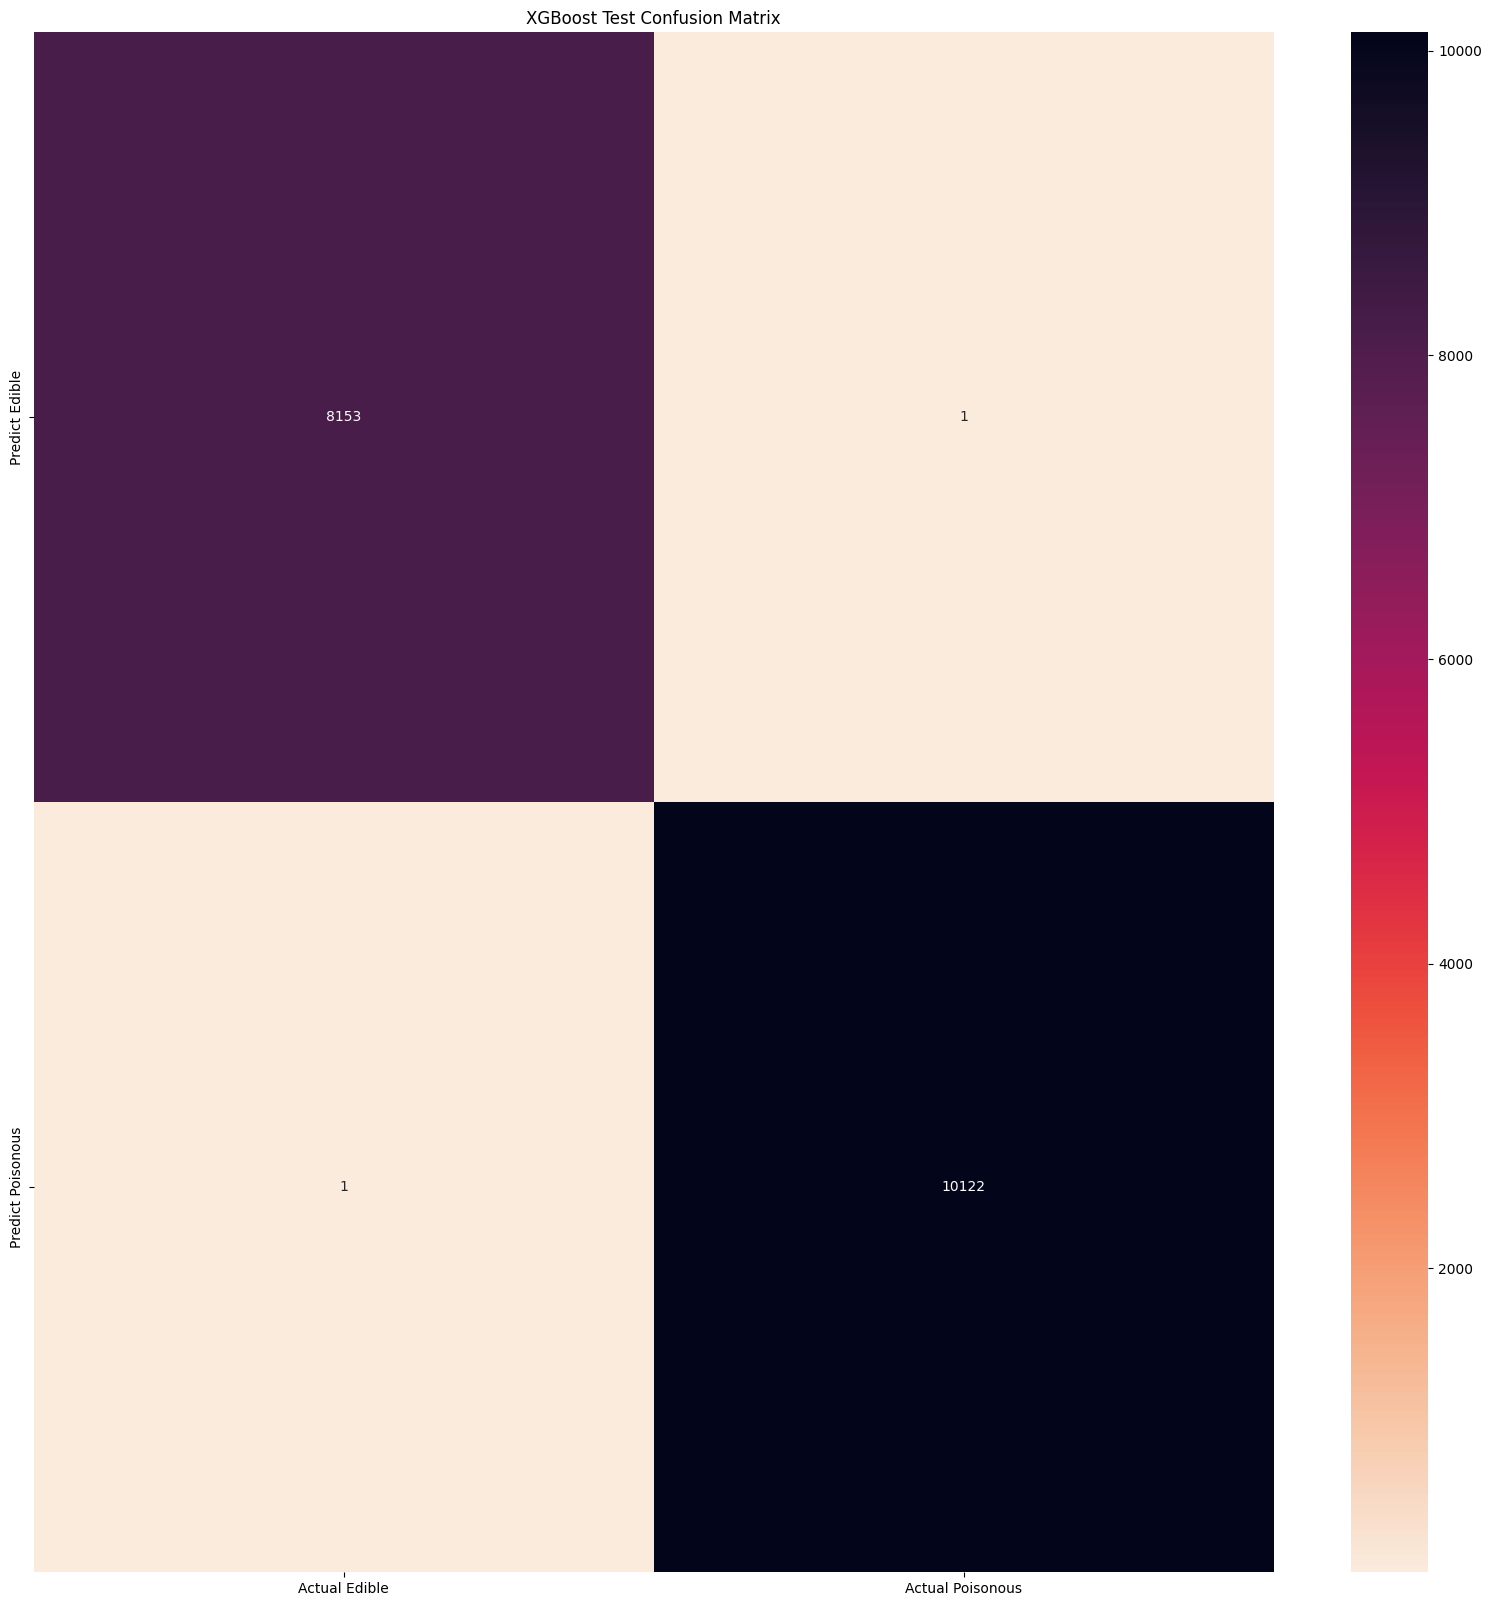

In [160]:
plt.figure(figsize=(20, 20))
plt.title("XGBoost Test Confusion Matrix")
cm_matrix = pd.DataFrame(data=xgbm_test_cnf_matrix, columns=['Actual Edible', 'Actual Poisonous'], index=['Predict Edible', 'Predict Poisonous'])
xgboost_cm = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')
plt.show()
xgboost_cm.figure.savefig('Result/Analysis Images/XGBoost_Test_Confusion_Matrix.png')

### Feature Importance

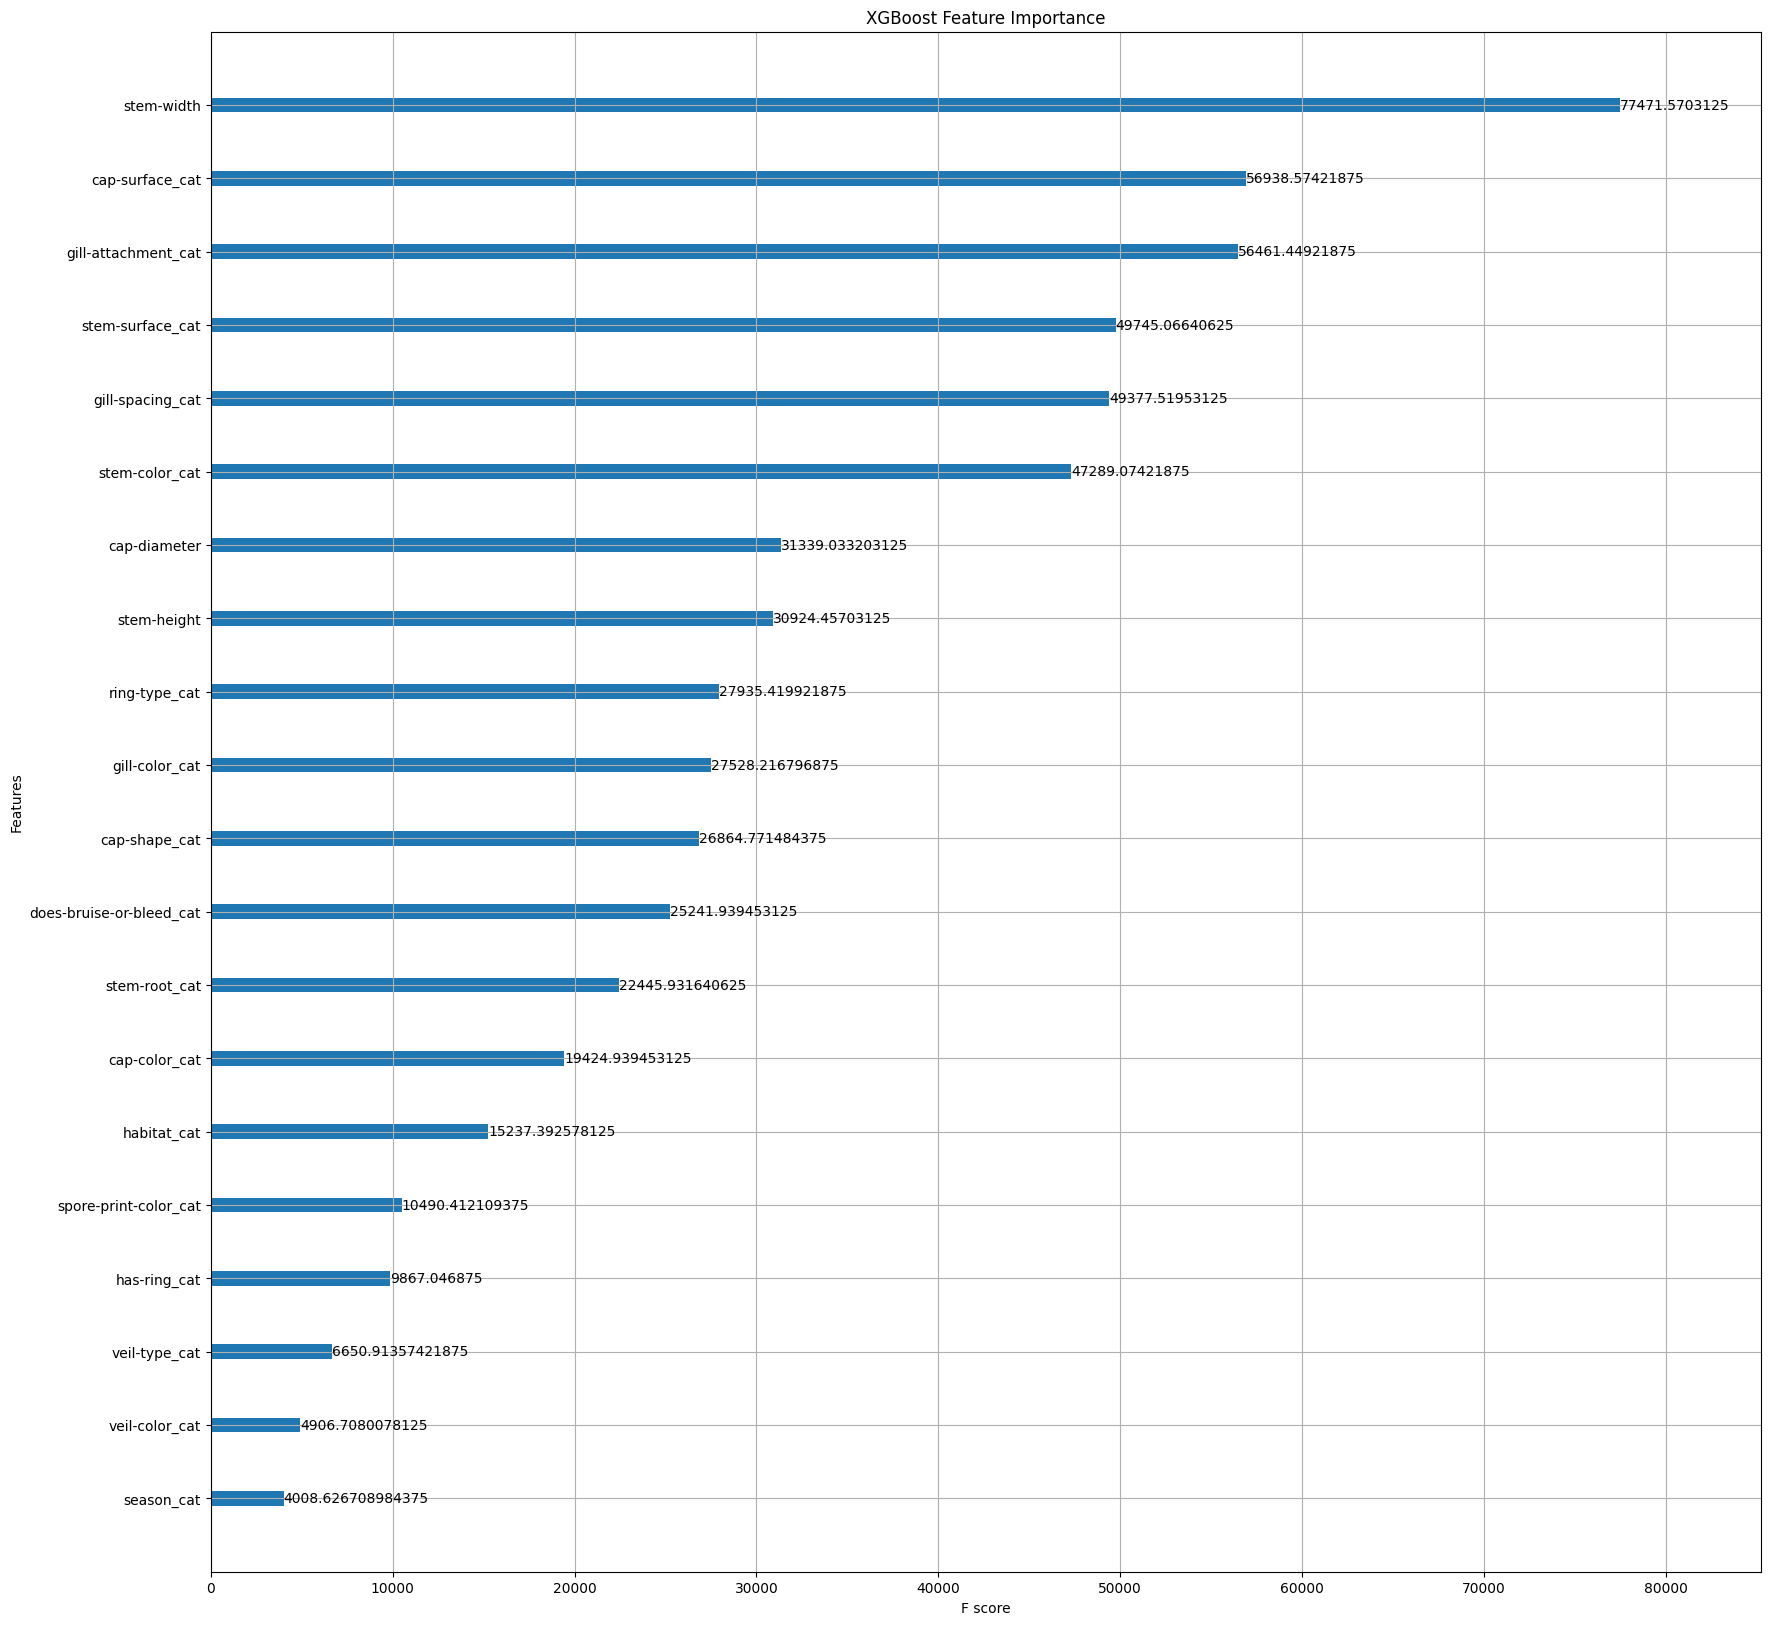

In [141]:
plt.rcParams["figure.figsize"] = (20, 20)
xgboost_fi = plot_importance(xgbm, importance_type='total_gain', title="XGBoost Feature Importance")
plt.show()
xgboost_fi.figure.savefig('Result/Analysis Images/XGBoost_Feature_Importance.png')

### Save Model

In [95]:
xgbm_full = XGBClassifier()
xgbm_full.set_params(**xgb_params)
xgbm_full.fit(X_scaled, y, eval_set=[(X_train, y_train), (X_test, y_test)])
xgbm_full.get_booster().feature_names = feature_names

[0]	validation_0-error:0.44616	validation_1-error:0.44613
[1]	validation_0-error:0.40522	validation_1-error:0.40444
[2]	validation_0-error:0.37293	validation_1-error:0.37058
[3]	validation_0-error:0.35741	validation_1-error:0.35668
[4]	validation_0-error:0.35631	validation_1-error:0.35509
[5]	validation_0-error:0.25895	validation_1-error:0.25737
[6]	validation_0-error:0.24656	validation_1-error:0.24517
[7]	validation_0-error:0.24291	validation_1-error:0.23948
[8]	validation_0-error:0.24265	validation_1-error:0.23932
[9]	validation_0-error:0.21390	validation_1-error:0.21037
[10]	validation_0-error:0.18248	validation_1-error:0.18187
[11]	validation_0-error:0.18027	validation_1-error:0.18006
[12]	validation_0-error:0.17425	validation_1-error:0.17377
[13]	validation_0-error:0.16742	validation_1-error:0.16545
[14]	validation_0-error:0.13364	validation_1-error:0.13268
[15]	validation_0-error:0.13628	validation_1-error:0.13542
[16]	validation_0-error:0.13624	validation_1-error:0.13520
[17]	va

In [96]:
xgbm_full.save_model("Result/Models/xgboost.json")

## Random Forest

### Training

In [97]:
rfcm = RandomForestClassifier(oob_score=True, criterion = 'gini', n_estimators = 100, random_state=42, verbose=2)

In [98]:
rfcm.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.1s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87

RandomForestClassifier(oob_score=True, random_state=42, verbose=2)

In [99]:
rfcm_y_train_pred = rfcm.predict(X_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [100]:
rfcm_train_acc = metrics.accuracy_score(y_train, rfcm_y_train_pred)
rfcm_train_pre = metrics.precision_score(y_train, rfcm_y_train_pred, average='weighted')
rfcm_train_rec = metrics.recall_score(y_train, rfcm_y_train_pred, average='weighted')

In [101]:
print('Random Forest Accuracy on train dataset:', rfcm_train_acc)
print('Random Forest Precision on train dataset:', rfcm_train_pre)
print('Random Forest Recall on train dataset:', rfcm_train_rec)

Random Forest Accuracy on train dataset: 1.0
Random Forest Precision on train dataset: 1.0
Random Forest Recall on train dataset: 1.0


### Testing

In [102]:
rfcm_y_test_preds = rfcm.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [103]:
rfcm_test_acc = metrics.accuracy_score(y_test, rfcm_y_test_preds)
rfcm_test_pre = metrics.precision_score(y_test, rfcm_y_test_preds)
rfcm_test_rec = metrics.recall_score(y_test, rfcm_y_test_preds)
rfcm_test_cnf_matrix = metrics.confusion_matrix(y_test, rfcm_y_test_preds)

In [104]:
print('Random Forest Model Accuracy on test dataset:', rfcm_test_acc)
print('Random Forest Model Precision on test dataset:', rfcm_test_pre)
print('Random Forest Model Recall on test dataset:', rfcm_test_rec)

Random Forest Model Accuracy on test dataset: 1.0
Random Forest Model Precision on test dataset: 1.0
Random Forest Model Recall on test dataset: 1.0


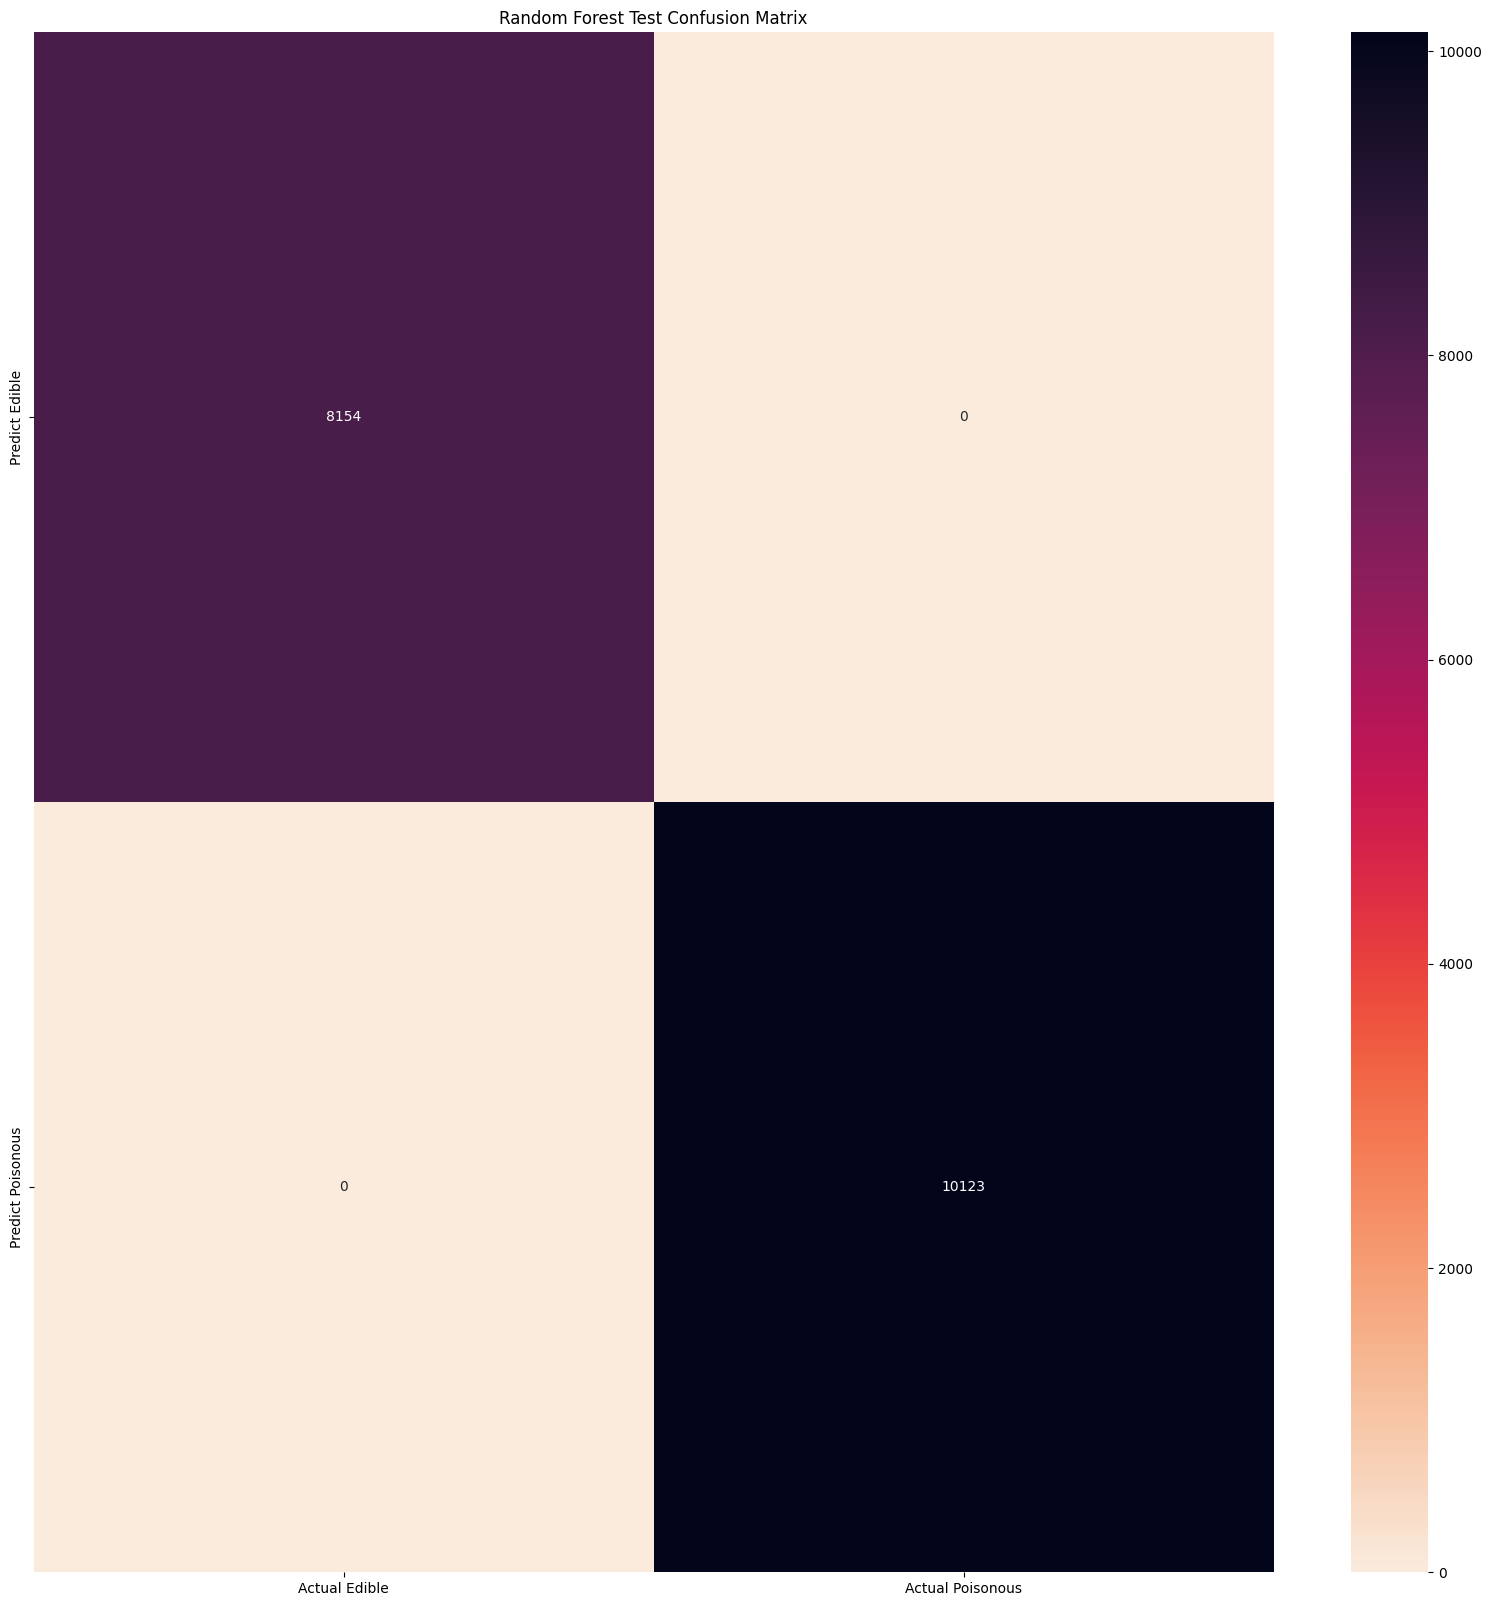

In [159]:
plt.figure(figsize=(20, 20))
plt.title("Random Forest Test Confusion Matrix")
cm_matrix = pd.DataFrame(data=rfcm_test_cnf_matrix, columns=['Actual Edible', 'Actual Poisonous'], index=['Predict Edible', 'Predict Poisonous'])
random_forest_cm = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')
plt.show()
random_forest_cm.figure.savefig('Result/Analysis Images/Random_Forest_Test_Confusion_Matrix.png')

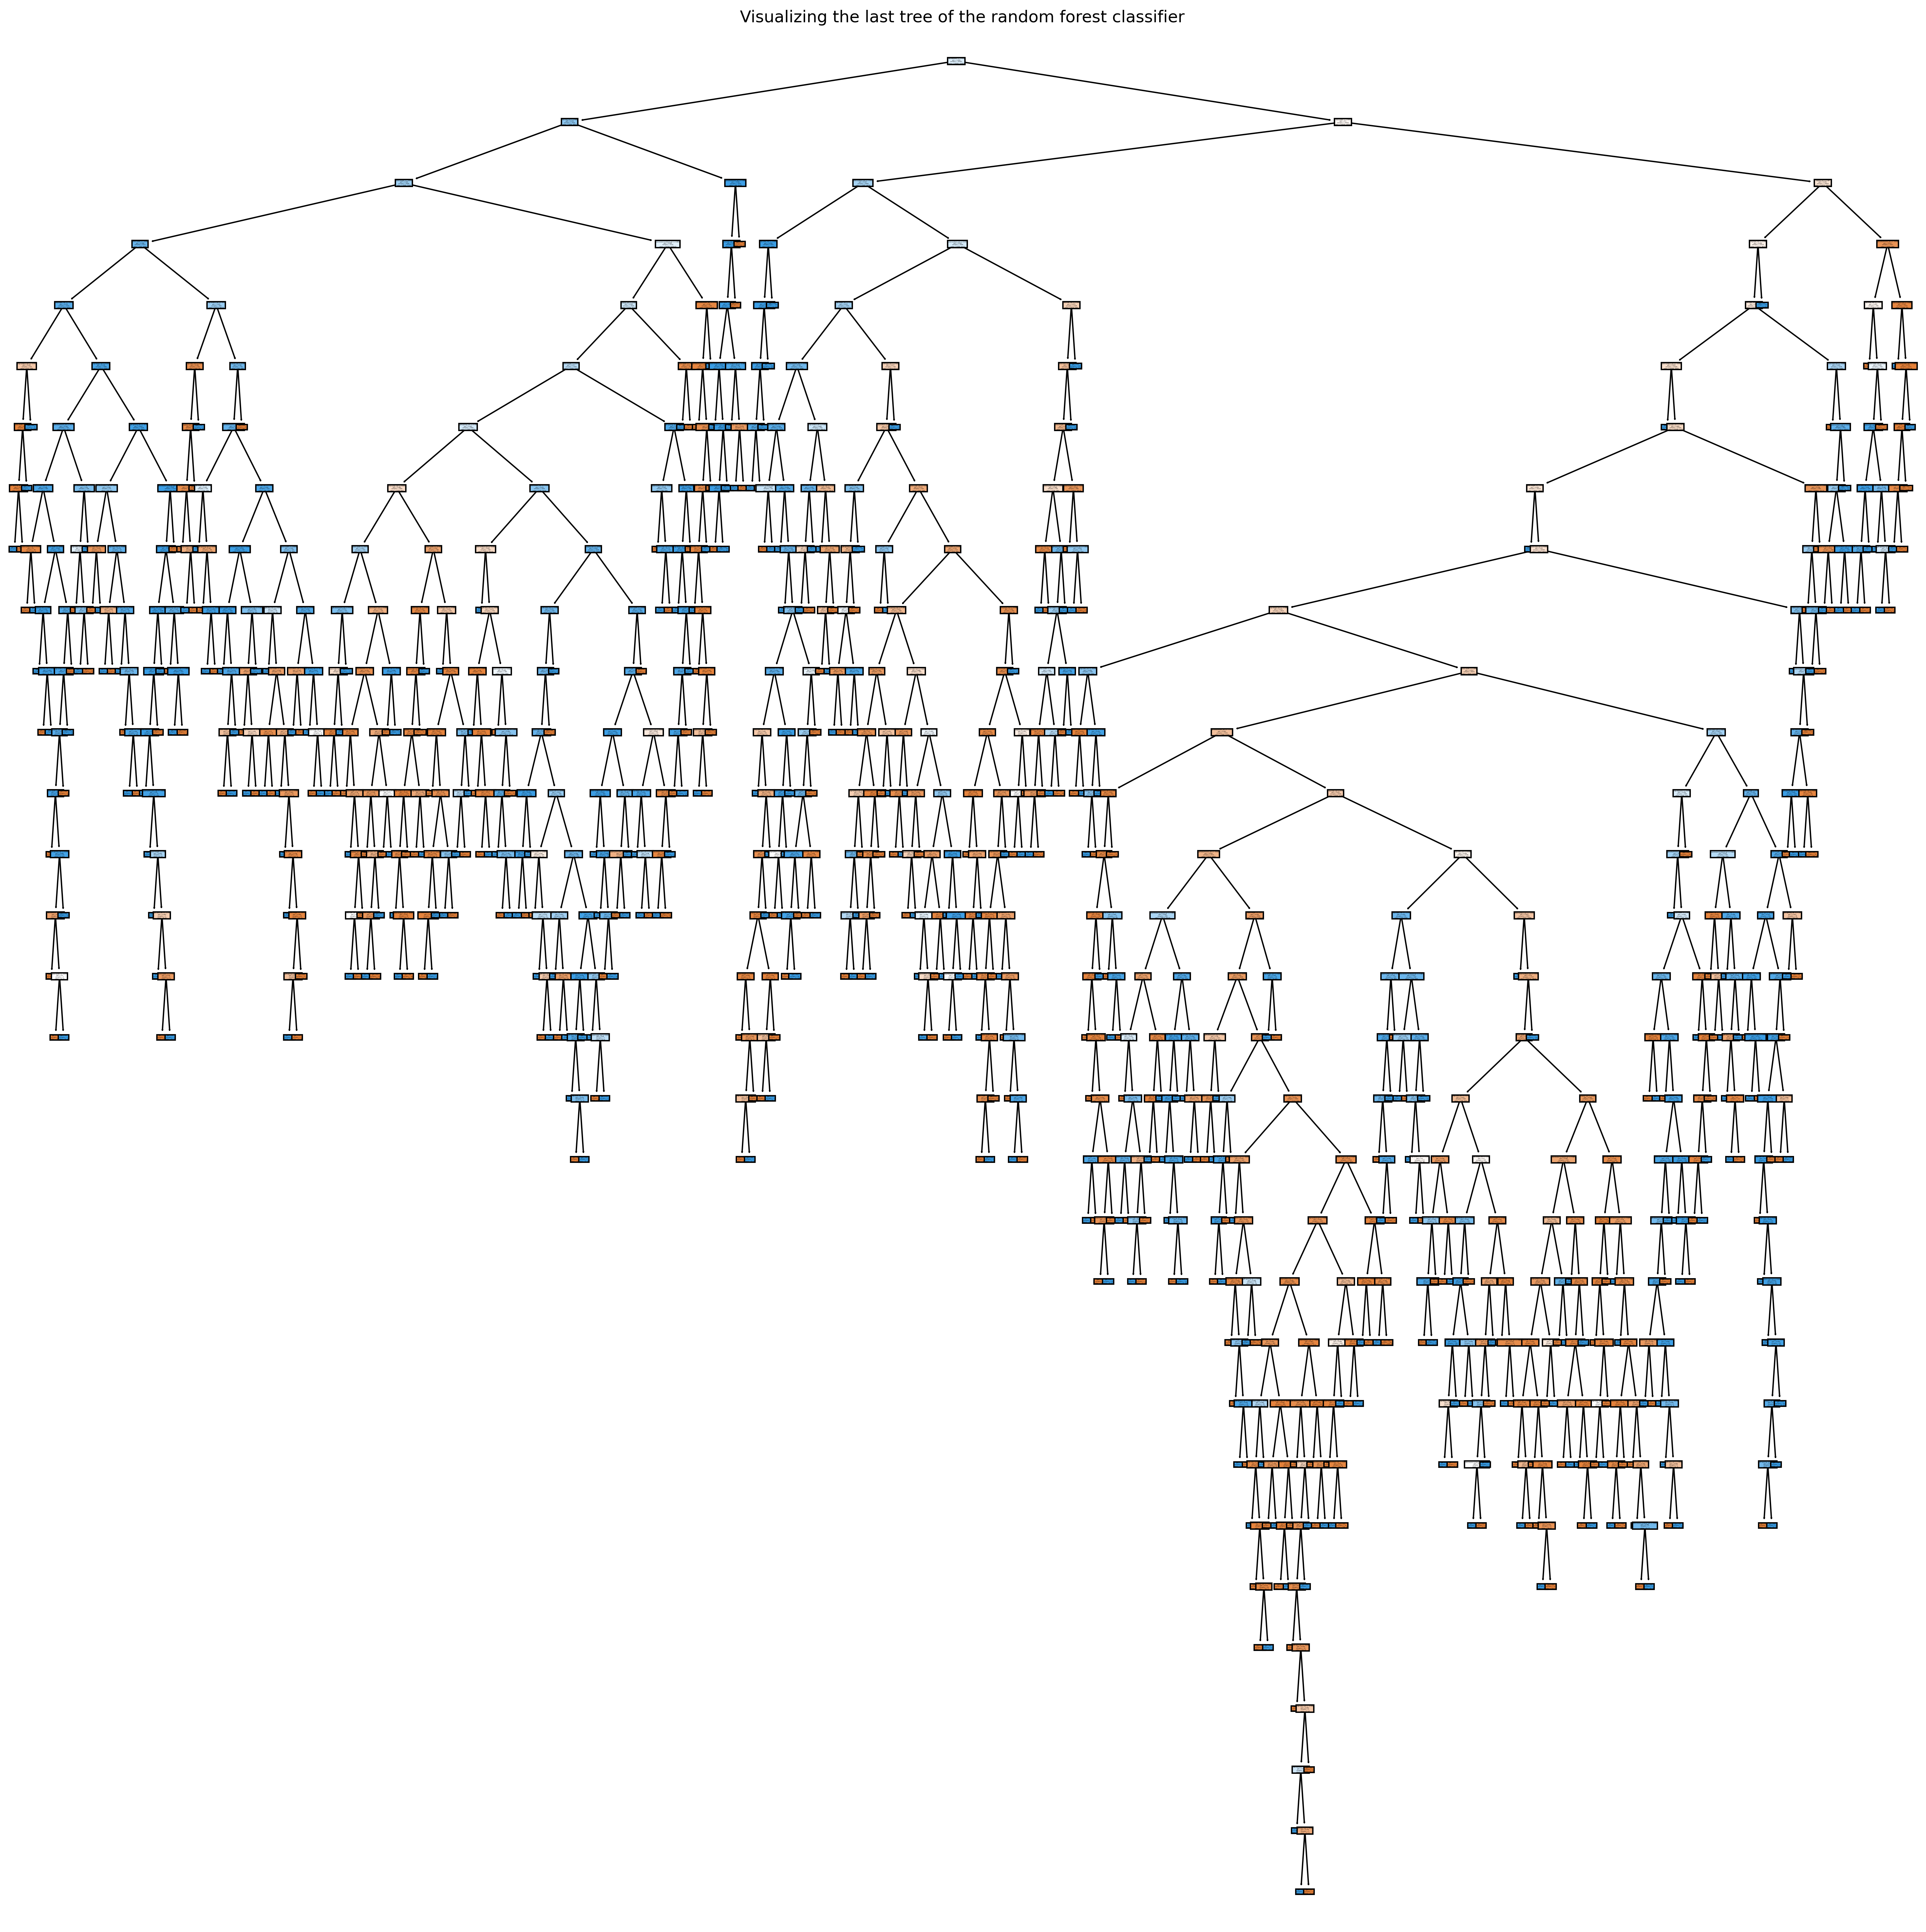

In [150]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 25), dpi=300)
tree.plot_tree(rfcm.estimators_[-1], feature_names=feature_names, filled=True, ax=axes)
plt.title("Visualizing the last tree of the random forest classifier")
plt.show()
fig.savefig('Result/Analysis Images/Random_Forest_Last_Tree.png')

### Feature Importance

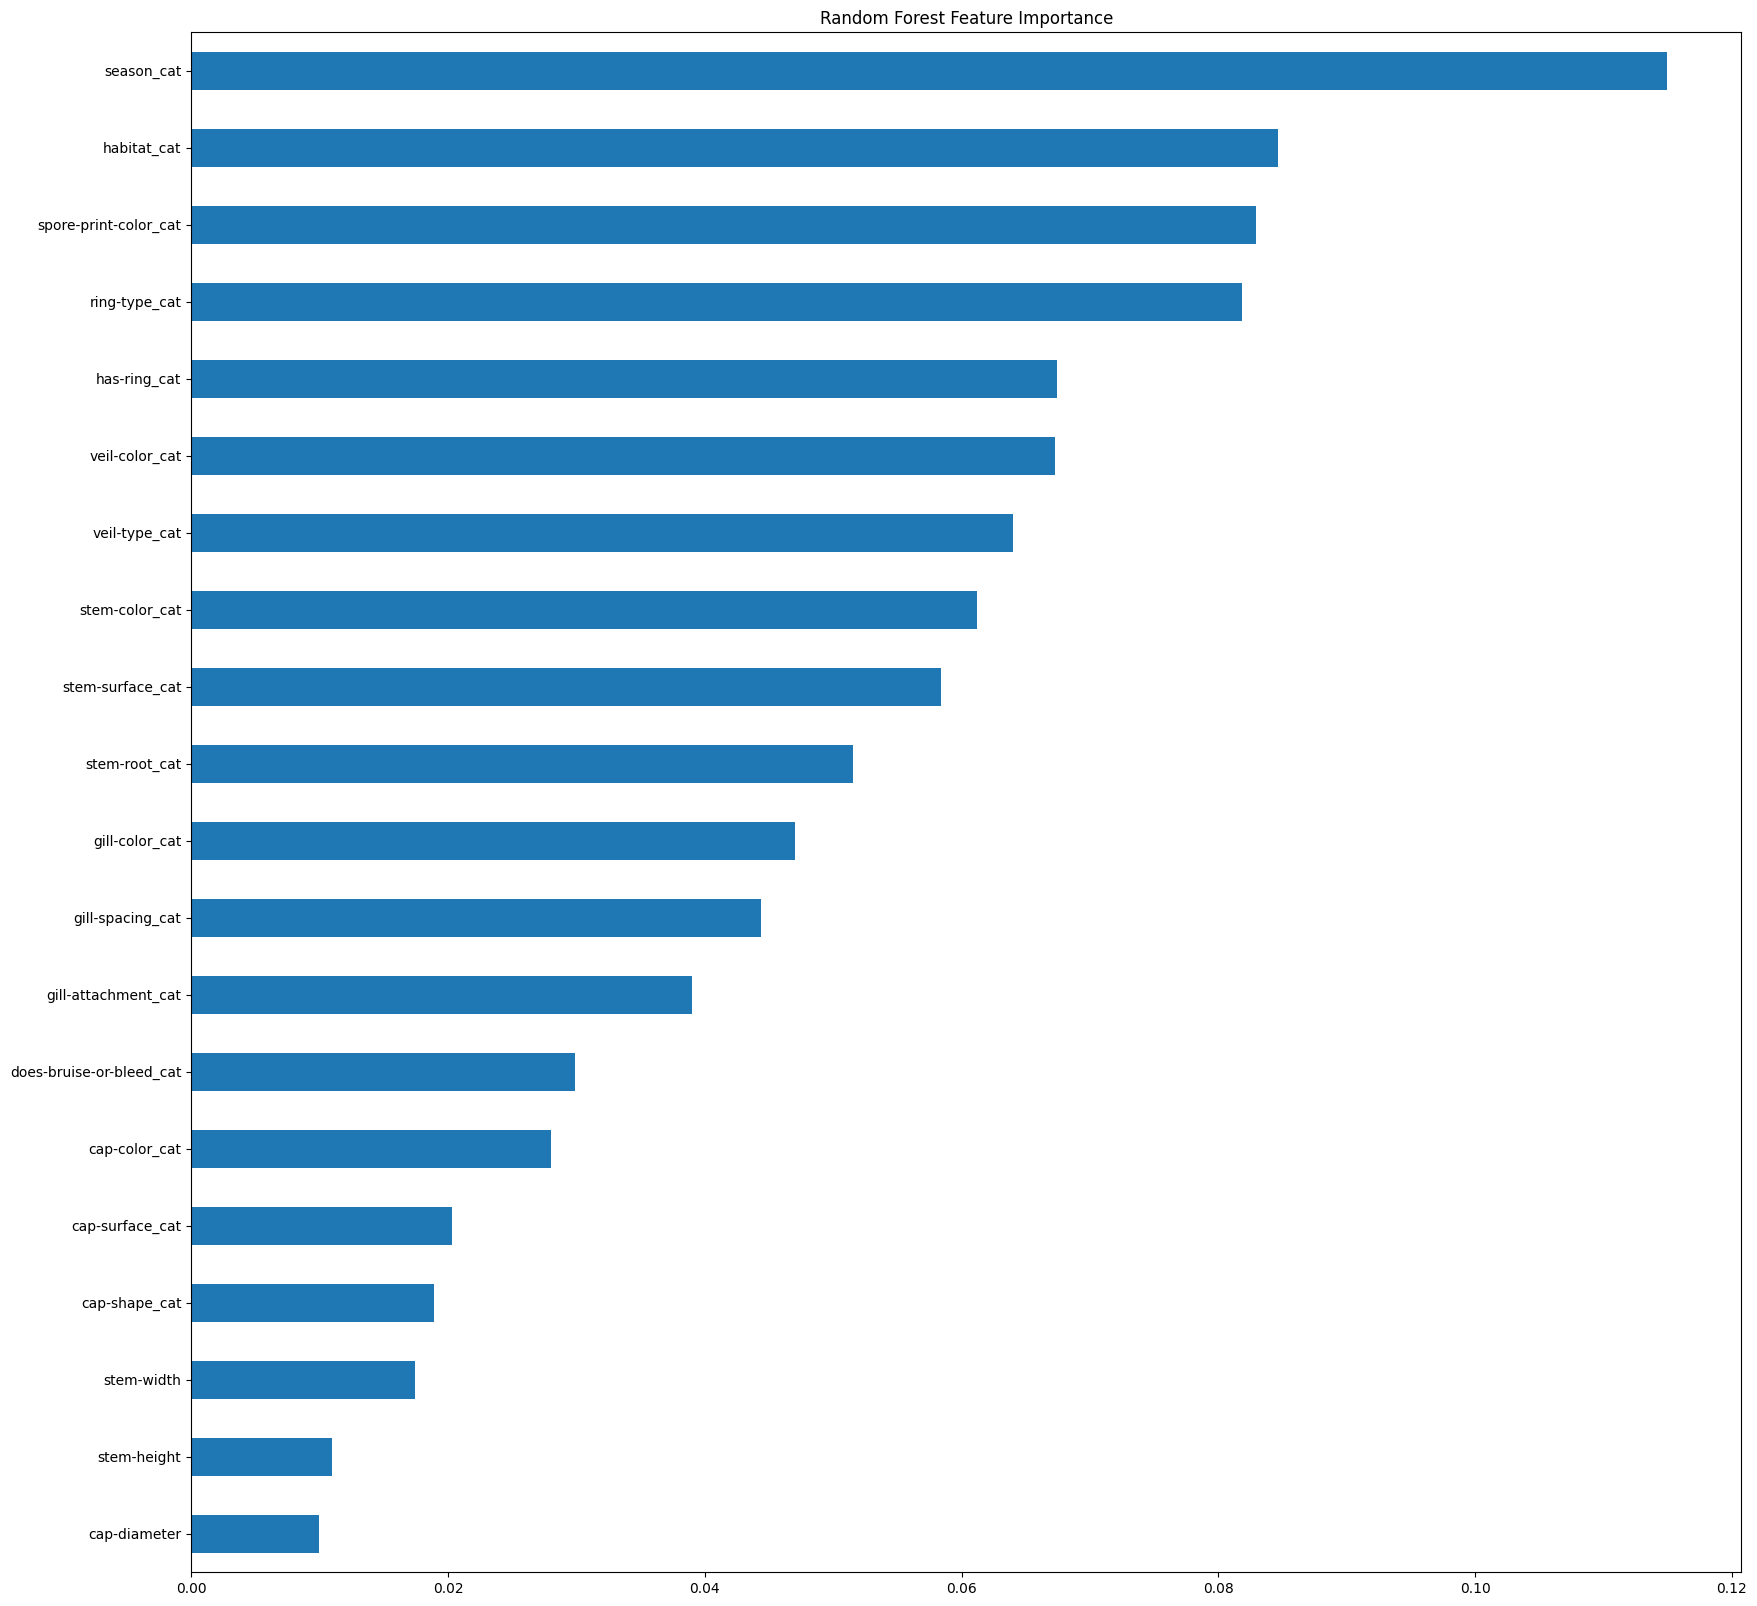

In [151]:
feat_importances = pd.Series(sorted(rfcm.feature_importances_), index=feature_names)
plt.title("Random Forest Feature Importance")
random_forest_fi = feat_importances.plot(kind='barh')
random_forest_fi.figure.savefig('Result/Analysis Images/Random_Forest_Feature_Importance.png')

### Save Model

In [108]:
rfc_full = RandomForestClassifier(oob_score=True, criterion = 'gini', n_estimators = 100, random_state=42, verbose=2)
rfc_full.fit(X_scaled, y)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.4s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

RandomForestClassifier(oob_score=True, random_state=42, verbose=2)

In [109]:
joblib.dump(rfc_full, "Result/Models/random_forest.joblib")

['Result/Models/random_forest.joblib']

## Data Exploration (Post Random Forest - Feature Importance)

As Random Forest had the best performance, we are going to explore the important features picked by random forest  

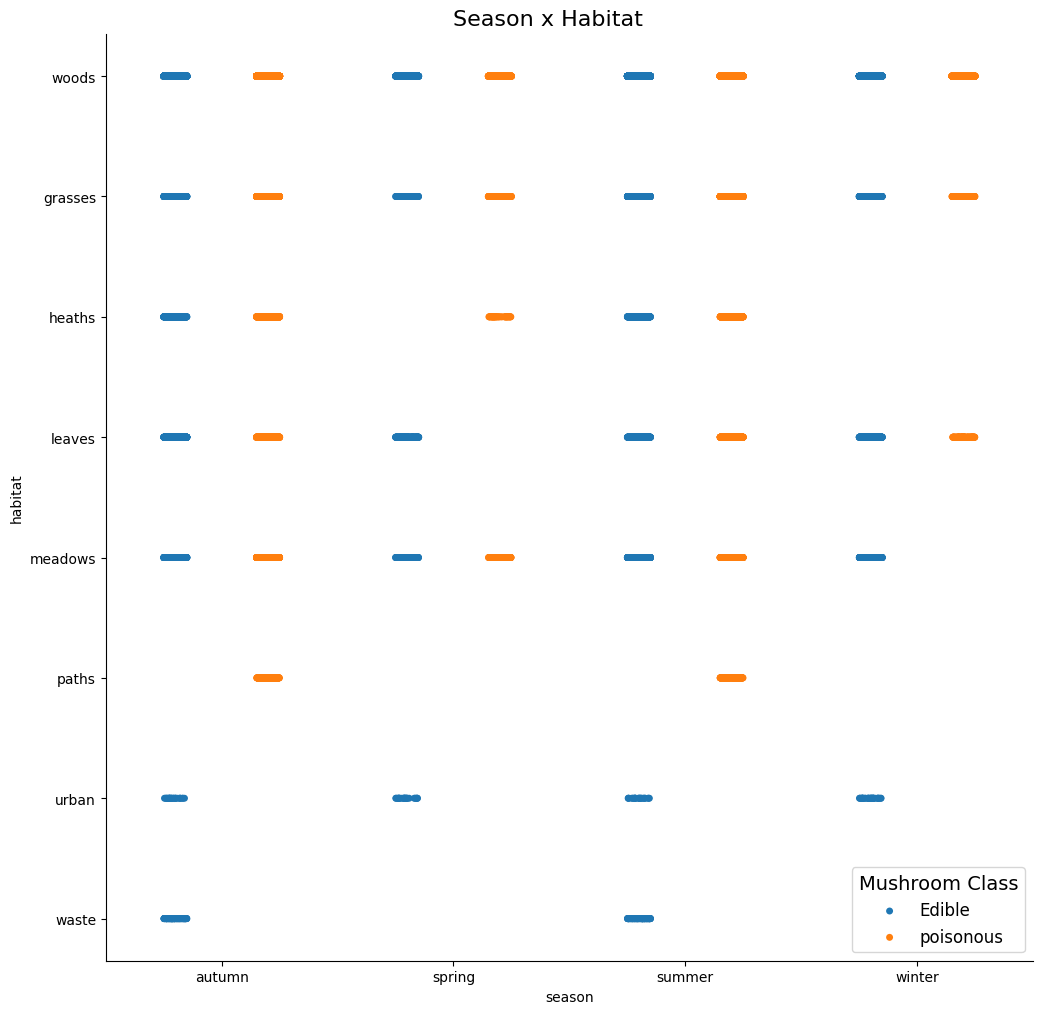

In [445]:
plot = sns.catplot(x ='season', y ='habitat', data = mushroom_data_dd_nao, hue ='class', dodge = True, height=10, legend=False)
plot.fig.suptitle("Season x Habitat", fontsize=16, y=1.01)
plot.set_xticklabels(['autumn', 'spring', 'summer', 'winter'])
plot.set_yticklabels(['waste', 'urban', 'paths', 'meadows', 'leaves', 'heaths', 'grasses', 'woods'][::-1])
plt.legend(title='Mushroom Class', loc='lower right', labels=['Edible', 'poisonous'], title_fontsize='14', fontsize='12')
plt.show()
plot.figure.savefig('Result/Analysis Images/Inference_Season_x_Habitat.png')

**Inference**
1. All the mushrooms that grow in 'urban' and 'waste' regardless of the season, are edible.
2. All the mushrooms that grow in paths are poisonous.
3. Mushrooms that grow in the 'heaths' during the spring are poisonous at the same mushrooms growing in the 'leaves' during the same season are edible.

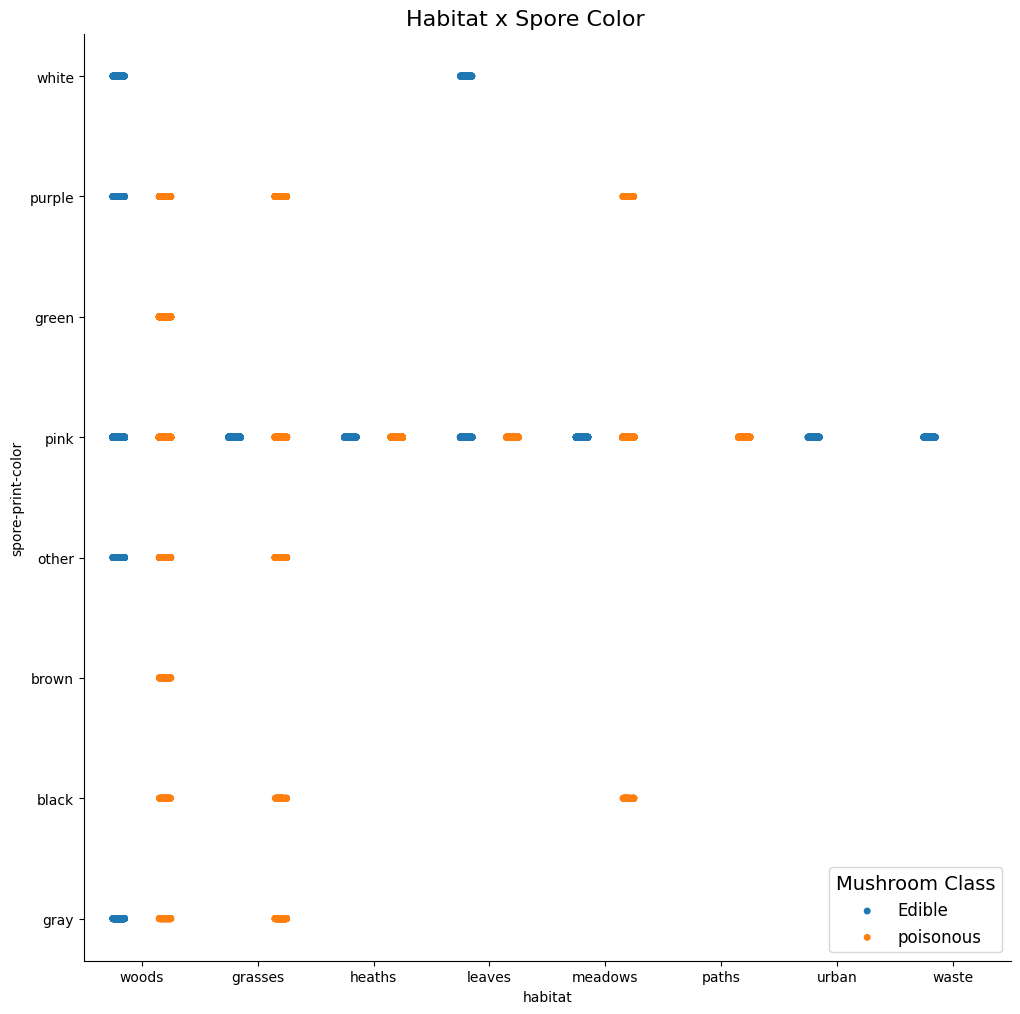

In [447]:
plot = sns.catplot(x ='habitat', y ='spore-print-color', data = mushroom_data_dd_nao, hue ='class', dodge = True, height=10, legend=False)
plot.fig.suptitle("Habitat x Spore Color", fontsize=16, y=1.01)
plot.set_xticklabels(['waste', 'urban', 'paths', 'meadows', 'leaves', 'heaths', 'grasses', 'woods'][::-1])
plot.set_yticklabels(['white', 'purple', 'green', 'pink', 'other', 'brown', 'black', 'gray'])
plt.legend(title='Mushroom Class', loc='lower right', labels=['Edible', 'poisonous'], title_fontsize='14', fontsize='12')
plt.show()
plot.figure.savefig('Result/Analysis Images/Inference_Habitat_x_Spore-Color.png')

**Inference**
1. All the mushrooms that have 'green', 'brown' or 'black' spore color in all habitats are poisonous.
2. Mushrooms that have 'white' spore are edible through out all the habitats.
3. Mushrooms growing in 'woods' habitat which have 'purple' or 'gray' spores can either be poisonous or edible but the same mushrooms in any other habitats are always poisonous.

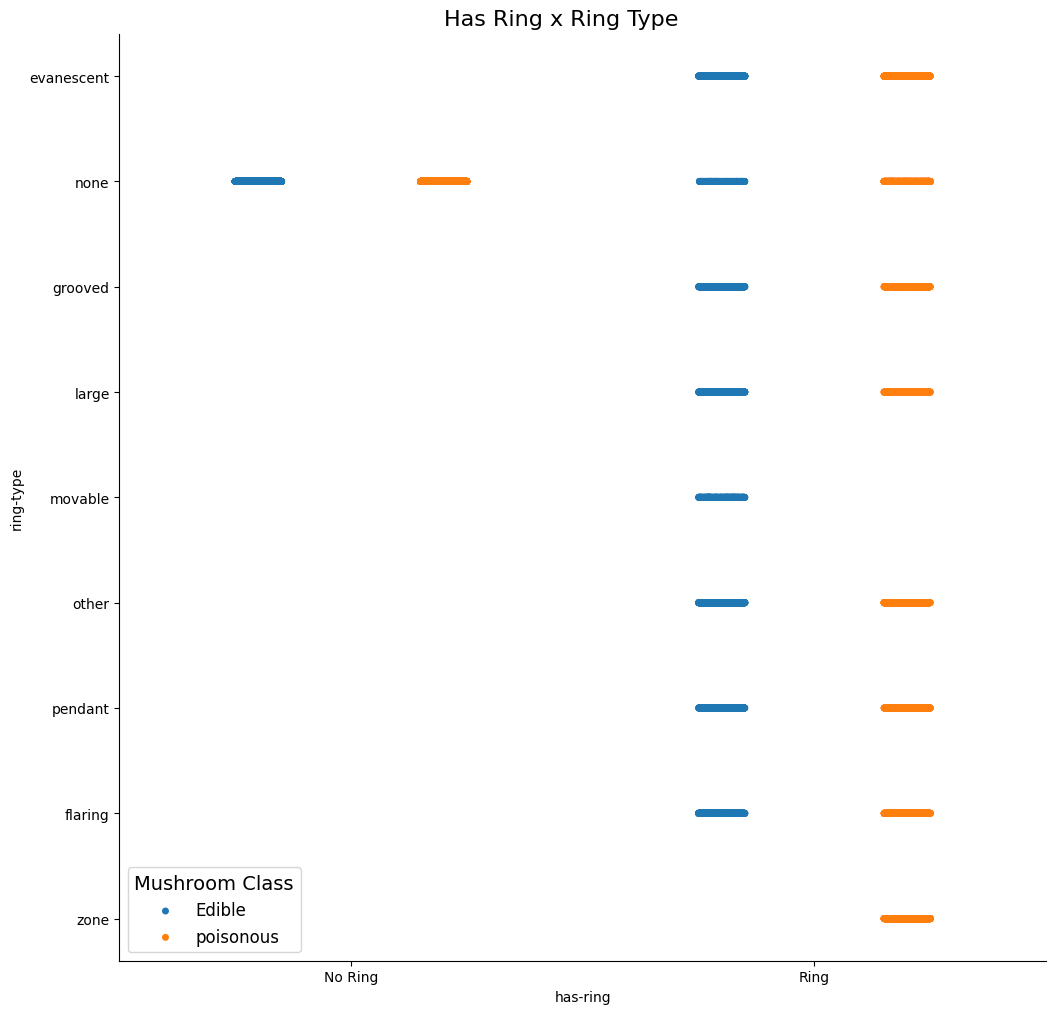

In [453]:
plot = sns.catplot(x ='has-ring', y ='ring-type', data = mushroom_data_dd_nao, hue ='class', dodge = True, height=10, legend=False)
plot.fig.suptitle("Has Ring x Ring Type", fontsize=16, y=1.01)
plot.set_xticklabels(['No Ring', 'Ring'])
plot.set_yticklabels(['zone', 'flaring', 'pendant', 'other', 'movable', 'large', 'grooved', 'none', 'evanescent'][::-1])
plt.legend(title='Mushroom Class', loc='lower left', labels=['Edible', 'poisonous'], title_fontsize='14', fontsize='12')
plt.show()
plot.figure.savefig('Result/Analysis Images/Inference_Has-Ring_x_Ring-Type.png')

**Inference**
1. All the mushrooms that have 'zone' type rings are poisonous.
2. All mushrooms with 'movable' ring are edible.

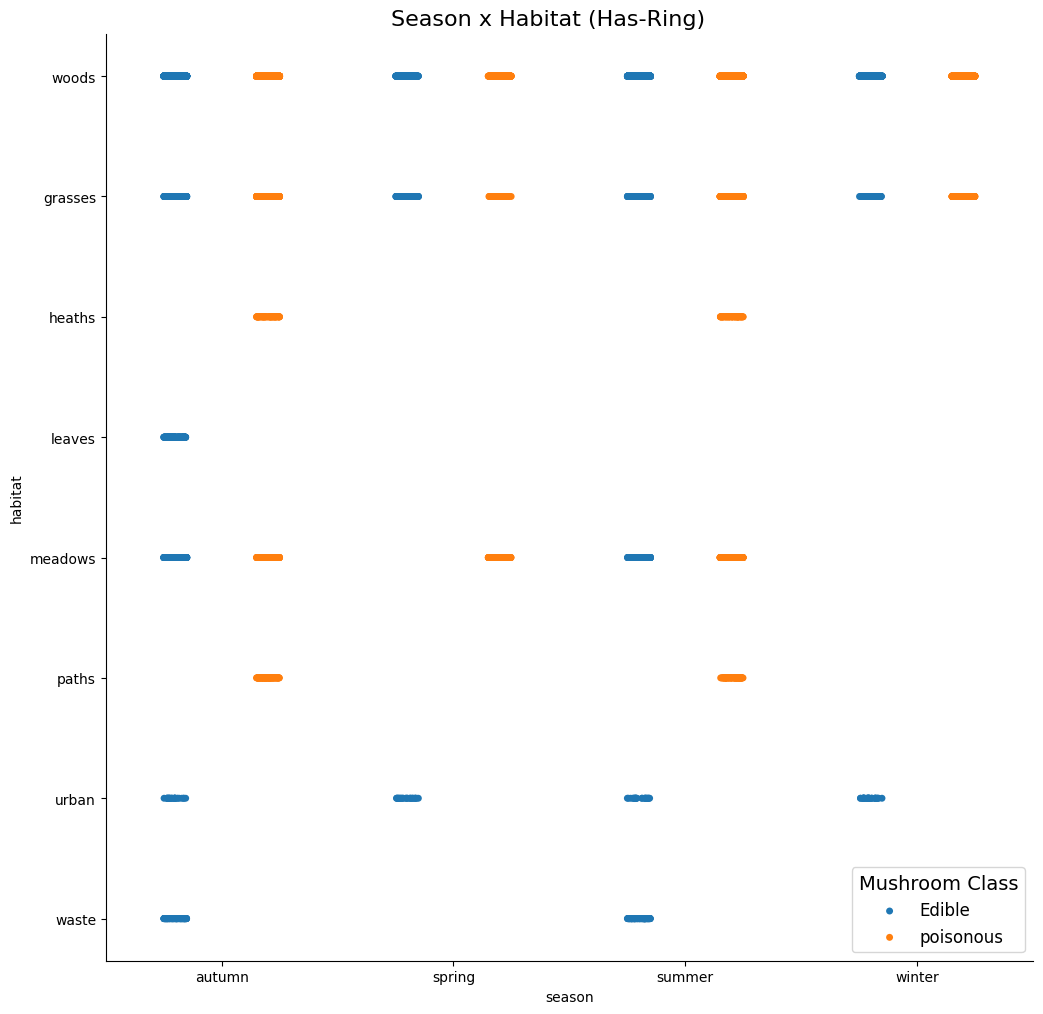

In [456]:
plot = sns.catplot(x ='season', y ='habitat', data = mushroom_data_dd_nao.loc[mushroom_data_dd_nao['has-ring'] == 't'], hue ='class', dodge = True, height=10, legend=False)
plot.fig.suptitle("Season x Habitat (Has-Ring)", fontsize=16, y=1.01)
plot.set_xticklabels(['autumn', 'spring', 'summer', 'winter'])
plot.set_yticklabels(['waste', 'urban', 'paths', 'meadows', 'leaves', 'heaths', 'grasses', 'woods'][::-1])
plt.legend(title='Mushroom Class', loc='lower right', labels=['Edible', 'poisonous'], title_fontsize='14', fontsize='12')
plt.show()
plot.figure.savefig('Result/Analysis Images/Inference_Season_x_Habitat_f_Has-Ring.png')

**Inference**
1. Given the mushroom has a ring, if it grows in 'waste', 'urban' or 'leaves' regardless of the season are edible.
2. All ring mushrooms growing in 'paths' or 'heaths' regardless the season are poisonous.

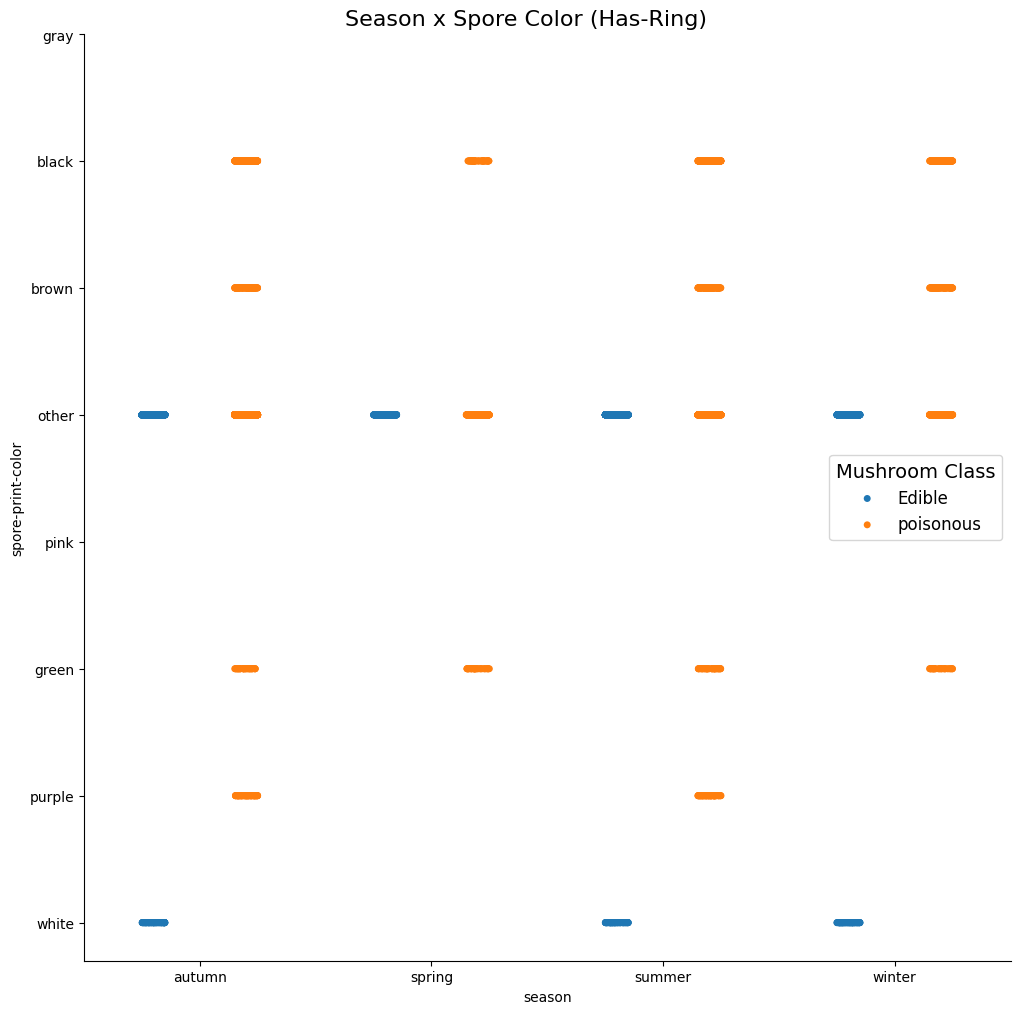

In [439]:
plot = sns.catplot(x ='season', y ='spore-print-color', data = mushroom_data_dd_nao.loc[mushroom_data_dd_nao['has-ring'] == 't'], hue ='class', dodge = True, height=10, legend=False)
plot.fig.suptitle("Season x Spore Color (Has-Ring)", fontsize=16, y=1.01)
plot.set_xticklabels(['autumn', 'spring', 'summer', 'winter'])
plot.set_yticklabels(['white', 'purple', 'green', 'pink', 'other', 'brown', 'black', 'gray'][::-1])
plt.legend(title='Mushroom Class', loc='right', labels=['Edible', 'poisonous'], title_fontsize='14', fontsize='12')
plt.show()
plot.figure.savefig('Result/Analysis Images/Inference_Season_x_Spore-Color_f_Has-Ring.png')

**Inference**
1. All the ring mushrooms, which are 'purple', 'green', 'brown' or 'black' spores regardless the season are poisonous.
2. Ring mushrooms with 'white' spores are edible in all seasons.